# Applied Plotting, Charting & Data Representation in Python

The following notebook is my final project for the Coursera course 'Applied Plotting, Charting & Data Representation in Python' by University of Michigan.

The questions I set out to answer were: 
- Which UK political parties have been in power over the last 100 years?
- How was the vote share for major UK political parties changed over the last 100 years?
- Has there been any notable change to voter turnout over the last 100 years?

The data I utilised were:

1918-2019 Election data accessed from:
https://commonslibrary.parliament.uk/research-briefings/cbp-7529/   'General Elections and Governments (xlsx)'

2024 Election data accessed from:
https://commonslibrary.parliament.uk/research-briefings/cbp-10009/   'Detailed results by candidate (xlsx)'

2024 voter turnout data from:
https://researchbriefings.files.parliament.uk/documents/CBP-10009/CBP-10009.pdf

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

In [22]:
# read in excel file for 2024 data
votes_2024 = pd.read_excel('2024_Candidate-votes.xlsx', skiprows=2)
votes_2024.head()

,ONS ID,ONS region ID,Constituency name,Region name,Country name,Constituency type,Party name,Party abbreviation,Electoral Commission party ID,MNIS party ID,Electoral Commission adjunct party ID,Candidate first name,Candidate surname,Candidate gender,Sitting MP,Former MP,Member MNIS ID,Votes,Share,Change
0,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Heritage Party,HPUK,PP12550,1037,NaN,Rhiannon,Morrissey,Female,No,No,NaN,183,0.005118,NaN
1,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Independent,Ind,NaN,8,NaN,Captain,Beany,Male,No,No,NaN,618,0.017284,NaN
2,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Liberal Democrat,LD,PP90,17,NaN,Justin,Griffiths,Male,No,No,NaN,916,0.025619,-0.011412
3,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Green,Green,PP63,44,NaN,Nigel,Hill,Male,No,No,NaN,1094,0.030597,0.014817
4,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Conservative,Con,PP52,4,NaN,Abigail,Mainon,Female,No,No,NaN,2903,0.081191,-0.145088


In [24]:
# count up votes for total, labour, convervatives, liberal democrats, and other parties
votes_2024.rename(columns={'Party abbreviation': 'Party'}, inplace=True)
votes_2024['Party'].replace({'Lab':'LAB', 'Con':'CON'}, inplace=True)
total_votes_2024 = votes_2024['Votes'].sum()
Lab_Con_LD_2024 = votes_2024[['Party', 'Votes']].groupby('Party').agg('sum').loc[['LAB', 'CON', 'LD']]
other_2024 = total_votes_2024 - Lab_Con_LD_2024.sum()

In [26]:
# convert votes to % and combine in one df
Lab_Con_LD_2024 = Lab_Con_LD_2024/total_votes_2024 * 100
Lab_Con_LD_2024.loc['Other'] = other_2024/total_votes_2024 * 100
perc_votes_2024 = Lab_Con_LD_2024.rename(columns={'Votes':'% Votes'}).copy()
perc_votes_2024.reset_index(inplace=True)
perc_votes_2024['Year'] = 2024
perc_votes_2024

,Party,% Votes,Year
0,LAB,33.700683,2024
1,CON,23.704416,2024
2,LD,12.215573,2024
3,Other,30.379328,2024


In [28]:
# confirm percents add to 100%
perc_votes_2024['% Votes'].sum() == 100.0

True

In [30]:
# read in data for 1918-2019
# there were two elections in 1974, in Feb and Oct. We will just use Feb data as this election had a higher voter turnout
votes_1918_2019 = pd.read_excel('1918-2019_Election-data.xlsx', sheet_name=3, skiprows=1)
votes_1918_2019['Election'].replace('1974F', 1974, inplace=True)
votes_1918_2019.head()

,Election,Country,Party,Votes,Total votes,Vote share,Candidates,Total candidates,Seats,Total seats
0,1974O,UK,CON,10462565.0,29189104.0,0.358441,622.0,2252,277.0,635
1,1974O,UK,LAB,11457079.0,29189104.0,0.392512,623.0,2252,319.0,635
2,1974O,UK,LD,5346704.0,29189104.0,0.183175,619.0,2252,13.0,635
3,1974O,UK,PC/SNP,1005938.0,29189104.0,0.034463,107.0,2252,14.0,635
4,1974O,UK,Other,916818.0,29189104.0,0.031410,281.0,2252,12.0,635


In [32]:
# Filter data for years we want and over whole of UK
votes_1918_2019 = votes_1918_2019[votes_1918_2019['Election'].isin(np.arange(1918,2020))]
votes_1918_2019 = votes_1918_2019[votes_1918_2019['Country'] == 'UK']

# Convert votes to %
votes_1918_2019['% Votes'] = votes_1918_2019['Vote share'] * 100
votes_1918_2019 = votes_1918_2019[['Election', 'Party', '% Votes']]
votes_1918_2019.rename(columns={'Election':'Year'}, inplace=True)

votes_1918_2019.head(10)

,Year,Party,% Votes
25,1974,CON,37.881680
26,1974,LAB,37.158761
27,1974,LD,19.334677
28,1974,PC/SNP,2.567166
29,1974,Other,3.057716
50,2019,CON,43.625932
51,2019,LAB,32.076641
52,2019,LD,11.546218
53,2019,PC/SNP,4.359468
54,2019,Other,8.391740


In [34]:
# To merge 'PC/SNP' party with 'Other' party, first take them both out into a separate df
others = votes_1918_2019[votes_1918_2019['Party'].isin(['PC/SNP','Other'])]
others.head(8)

,Year,Party,% Votes
28,1974,PC/SNP,2.567166
29,1974,Other,3.057716
53,2019,PC/SNP,4.359468
54,2019,Other,8.391740
78,2017,PC/SNP,3.546233
79,2017,Other,6.755923
103,2015,PC/SNP,5.329750
104,2015,Other,19.541005


In [36]:
# Sum them together by year
others = others.groupby('Year').agg('sum').reset_index()
others['Party'] = 'Other'
others.head()

/var/folders/kz/nb8wlm4n5y79jmr7mvx018k40000gn/T/ipykernel_29461/1536377526.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  others = others.groupby('Year').agg('sum').reset_index()


,Year,% Votes,Party
0,1918,14.9,Other
1,1922,3.0,Other
2,1923,1.6,Other
3,1924,2.1,Other
4,1929,1.3,Other


In [38]:
# Then drop them from their original df and concatenate them back from the summed df, as well as with the 2024 df
votes_1918_2019.drop(votes_1918_2019[votes_1918_2019['Party'].isin(['PC/SNP','Other'])].index, inplace=True)
votes_all = pd.concat([votes_1918_2019, others, perc_votes_2024], ignore_index=True).sort_values(['Year', '% Votes'], ascending=False).reset_index(drop=True)
votes_all.head(8)

,Year,Party,% Votes
0,2024,LAB,33.700683
1,2024,Other,30.379328
2,2024,CON,23.704416
3,2024,LD,12.215573
4,2019,CON,43.625932
5,2019,LAB,32.076641
6,2019,Other,12.751209
7,2019,LD,11.546218


In [40]:
# generate pivot table for ease of plotting
votes_pt = votes_all.pivot_table(values='% Votes', index='Year', columns='Party')
votes_pt.index = votes_pt.index.astype(int)
votes_pt.rename(columns={'CON':'Con', 'LAB':'Lab'}, inplace=True)
votes_pt.head()

Party,Con,Lab,LD,Other
Year,,,,
1918,38.7,20.8,25.6,14.9
1922,38.5,29.7,28.8,3.0
1923,38.0,30.7,29.7,1.6
1924,46.8,33.3,17.8,2.1
1929,38.1,37.1,23.5,1.3


In [42]:
# read in the voter turnout data, convert to %, filter years, hardcode in 2024 data
turnout_1918_2019 = pd.read_excel('1918-2019_Election-data.xlsx', sheet_name=5, skiprows=1)[['Election', 'United Kingdom']]
turnout_1918_2019.rename(columns={'Election':'Year', 'United Kingdom': '% Turnout'}, inplace=True)
turnout_1918_2019['% Turnout'] *= 100
turnout_1918_2019.replace('1974F', 1974, inplace=True)
turnout_1918_2019.set_index('Year', inplace=True)
turnout_1918_2019.drop('1974O', inplace=True)
turnout_1918_2019.loc[2024] = 60.0 # the voter turnout data for 2024 was found at the third link given at the top of the notebook
turnout_1918_2019.tail()

,% Turnout
Year,
2010,65.1
2015,66.2
2017,68.8
2019,67.3
2024,60.0


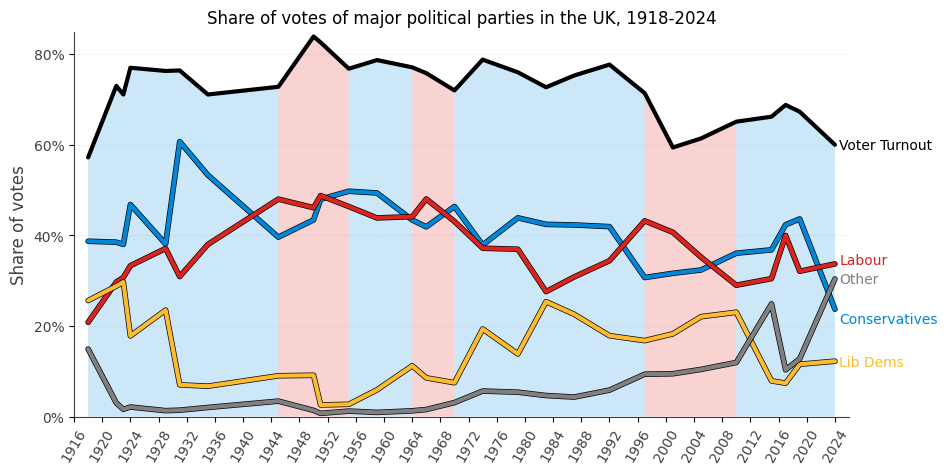

In [13]:
# we will use the official party colors
colors = {'Con':'#0087DC', 'Lab':'#DC241f', 'LD': '#FDBB30', 'Other':'grey'}
alpha = 0.75
fontsize=12


# make plots
fig, ax = plt.subplots(figsize=(10, 5))

votes_pt.plot(ax=ax,
               linewidth=3, 
               color=colors,
               path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])

turnout_1918_2019.plot(ax=ax,
                      linewidth=3,
                      color='black')


# modify ticks, labels and legend and tweak the aesthetics
plt.ylim(0, 85)
plt.yticks(np.arange(0, 81, 20), ['0%', '20%', '40%', '60%', '80%'], alpha=alpha)
plt.ylabel('Share of votes', alpha=alpha, fontsize=fontsize)

plt.xlim(1916, 2026)
plt.xticks(np.arange(1916, 2025, 4), rotation=60, alpha=alpha, fontsize=10);
plt.xlabel('')

plt.legend().set_visible(False)

for line in ax.get_lines():
    line.set_solid_capstyle('round')
    
plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_alpha(alpha)


# plot some faint lines to make it easier to determine % votes
for n in [20, 40, 60, 80]:
    plt.axhline(n, c='grey', linewidth=1, alpha=0.08)


# fill graph with a color based on current party in power
years = votes_pt.index
for i in range(len(years)-1):
    year = years[i]
    next_year = years[i+1]
    top_party = votes_pt.loc[year].sort_values(ascending=False).index[0]
    color = colors[top_party]
    plt.gca().fill_between([year, next_year], 
                           [0, 0], 
                           [turnout_1918_2019['% Turnout'].loc[year], turnout_1918_2019['% Turnout'].loc[next_year]], 
                           color=color, 
                           alpha=.2,
                          edgecolor=None)


# add text labels
plt.text(2024.6, votes_pt.loc[2024]['Lab'], 'Labour', color=colors['Lab'])
plt.text(2024.6, votes_pt.loc[2024]['Other']-1, 'Other', color=colors['Other'])
plt.text(2024.6, votes_pt.loc[2024]['Con']-3, 'Conservatives', color=colors['Con'])
plt.text(2024.6, votes_pt.loc[2024]['LD']-1, 'Lib Dems', color=colors['LD'])
plt.text(2024.6, turnout_1918_2019.loc[2024]-1, 'Voter Turnout', color='black')
plt.title('Share of votes of major political parties in the UK, 1918-2024');

# Answering the questions

Which UK political parties have been in power over the last 100 years?
- The blue/red shading under the voter turnout line clearly indicates which political parties have been in power over the last 100 years. Notably, Conservatives have dominated most of the last 100 years, with brief periods where Labour were in power.

How was the vote share for major UK political parties changed over the last 100 years?
- The coloured lines clearly show how vote share has changed for the major political parties over the last 100 years. While Labour and Conservatives have dominated most of the last 100 years, Lib Dems almost caught up with labour around 1984. Recently, 'Other' political parties have gained a much greater share of the vote.

Has there been any notable change to voter turnout over the last 100 years?
- The recent election demonstrates a significant decline in voter turnout.